In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# train.head()

In [33]:
def format_ticket(col_val):
    values = col_val.split(" ")
    if values[0] == "LINE":
        values[0] = 0
    return values[0] if len(values) == 1 else values[-1]

def calculate_age(cols, first, second, third):
    age = cols["Age"]
    pclass = cols["Pclass"]
    if pd.isnull(age):
        if pclass == 1:
            return first
        elif pclass == 2:
            return second
        else:
            return third
    else:
        return age

def calculate_fare(cols, first, second, third):
    fare = cols["Fare"]
    pclass = cols["Pclass"]
    if pd.isnull(fare):
        if pclass == 1:
            return first
        elif pclass == 2:
            return second
        else:
            return third
    else:
        return fare

In [53]:
train["Ticket"] = train["Ticket"].apply(format_ticket)
test["Ticket"] = test["Ticket"].apply(format_ticket)

first_class_age = train[train["Pclass"] == 1]["Age"].mean()
first_class_fare = train[train["Pclass"] == 1]["Fare"].mean()
second_class_age = train[train["Pclass"] == 2]["Age"].mean()
second_class_fare = train[train["Pclass"] == 2]["Fare"].mean()
third_class_age = train[train["Pclass"] == 3]["Age"].mean()
third_class_fare = train[train["Pclass"] == 3]["Fare"].mean()


age_args = {"first": first_class_age, "second": second_class_age, "third": third_class_age}
fare_args = {"first": first_class_fare, "second": second_class_fare, "third": third_class_fare}
train["Age"] = train[["Age", "Pclass"]].apply(calculate_age, axis=1, **age_args)
test["Age"] = test[["Age", "Pclass"]].apply(calculate_age, axis=1, **age_args)
test["Fare"] = test[["Fare", "Pclass"]].apply(calculate_fare, axis=1, **fare_args)

train.drop("Cabin", axis=1, inplace=True)
train.dropna(inplace=True)
test.drop("Cabin", axis=1, inplace=True)

sex = pd.get_dummies(train["Sex"], drop_first=True).astype(int)
embark = pd.get_dummies(train["Embarked"], drop_first=True).astype(int)
sex1 = pd.get_dummies(test["Sex"], drop_first=True).astype(int)
embark1 = pd.get_dummies(test["Embarked"], drop_first=True).astype(int)

train = pd.concat([train, sex, embark], axis=1)
test = pd.concat([test, sex1, embark1], axis=1)

train.drop(["Sex", "Embarked", "Name"], axis=1, inplace=True)
test.drop(["Sex", "Embarked", "Name"], axis=1, inplace=True)
train.drop("PassengerId", axis=1, inplace=True)
test.drop("PassengerId", axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,21171,7.2500,1,0,1
1,1,1,38.0,1,0,17599,71.2833,0,0,0
2,1,3,26.0,0,0,3101282,7.9250,0,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,35.0,0,0,373450,8.0500,1,0,1


In [54]:
scaler = StandardScaler()

In [55]:
# train.head()
scaler.fit(train.drop("Survived", axis=1))
scaler.fit(test)

StandardScaler()

In [92]:
scld_train = scaler.transform(train.drop("Survived", axis=1))
scld_test = scaler.transform(test)

In [94]:
scaled_train = pd.DataFrame(scld_train, columns=train.columns[1:])
scaled_test = pd.DataFrame(scld_test, columns=test.columns)

In [95]:
scaled_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0.873482,-0.588825,0.616992,-0.400248,-0.395638,-0.507756,0.755929,-0.351647,0.740370
1,-1.505120,0.658142,0.616992,-0.400248,-0.401724,0.640123,-1.322876,-0.351647,-1.350676
2,0.873482,-0.277084,-0.499470,-0.400248,4.851713,-0.495656,-1.322876,-0.351647,0.740370
3,-1.505120,0.424335,0.616992,-0.400248,-0.237828,0.314164,-1.322876,-0.351647,0.740370
4,0.873482,0.424335,-0.499470,-0.400248,0.204513,-0.493415,0.755929,-0.351647,0.740370


In [96]:
y = train["Survived"]
x = scaled_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q
0,0.873482,-0.588825,0.616992,-0.400248,-0.395638,-0.507756,0.755929,-0.351647,0.740370
1,-1.505120,0.658142,0.616992,-0.400248,-0.401724,0.640123,-1.322876,-0.351647,-1.350676
2,0.873482,-0.277084,-0.499470,-0.400248,4.851713,-0.495656,-1.322876,-0.351647,0.740370
3,-1.505120,0.424335,0.616992,-0.400248,-0.237828,0.314164,-1.322876,-0.351647,0.740370
4,0.873482,0.424335,-0.499470,-0.400248,0.204513,-0.493415,0.755929,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...
884,-0.315819,-0.199148,-0.499470,-0.400248,-0.071328,-0.404680,0.755929,-0.351647,0.740370
885,-1.505120,-0.822632,-0.499470,-0.400248,-0.240810,-0.099933,-1.322876,-0.351647,0.740370
886,0.873482,-0.344060,0.616992,1.640039,-0.420450,-0.217350,-1.322876,-0.351647,0.740370
887,-1.505120,-0.277084,-0.499470,-0.400248,-0.241975,-0.099933,0.755929,-0.351647,-1.350676


In [156]:
knn = KNeighborsClassifier(n_neighbors=9)

In [157]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [158]:
pred = knn.predict(x_test)

In [159]:
print(knn.score(x_test, y_test))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8258426966292135
[[199  17]
 [ 45  95]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       216
           1       0.85      0.68      0.75       140

    accuracy                           0.83       356
   macro avg       0.83      0.80      0.81       356
weighted avg       0.83      0.83      0.82       356



In [150]:
error_rate = []
for i in range(1, 100):
    n_knn = KNeighborsClassifier(n_neighbors=i)
    n_knn.fit(x_train, y_train)
    pred_i = n_knn.predict(x_test)

    error_rate.append(np.mean(pred_i != y_test))

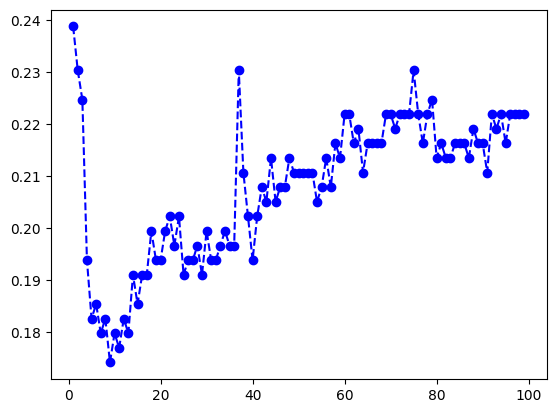

In [151]:
plt.plot(range(1,100), error_rate, color="blue", linestyle="dashed", marker="o")

In [152]:
lst_min = error_rate.index(min(error_rate))
lst_min

8

In [153]:
print(error_rate[8], error_rate[9])

0.17415730337078653 0.1797752808988764


In [155]:
print(error_rate)

[0.23876404494382023, 0.2303370786516854, 0.2247191011235955, 0.19382022471910113, 0.18258426966292135, 0.1853932584269663, 0.1797752808988764, 0.18258426966292135, 0.17415730337078653, 0.1797752808988764, 0.17696629213483145, 0.18258426966292135, 0.1797752808988764, 0.19101123595505617, 0.1853932584269663, 0.19101123595505617, 0.19101123595505617, 0.199438202247191, 0.19382022471910113, 0.19382022471910113, 0.199438202247191, 0.20224719101123595, 0.19662921348314608, 0.20224719101123595, 0.19101123595505617, 0.19382022471910113, 0.19382022471910113, 0.19662921348314608, 0.19101123595505617, 0.199438202247191, 0.19382022471910113, 0.19382022471910113, 0.19662921348314608, 0.199438202247191, 0.19662921348314608, 0.19662921348314608, 0.2303370786516854, 0.21067415730337077, 0.20224719101123595, 0.19382022471910113, 0.20224719101123595, 0.20786516853932585, 0.2050561797752809, 0.21348314606741572, 0.2050561797752809, 0.20786516853932585, 0.20786516853932585, 0.21348314606741572, 0.2106741